In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/danielgrijalvas/movies'
od.download(download_url)

Skipping, found downloaded files in "./movies" (use force=True to force download)


In [3]:
filaname = '/content/movies/movies.csv'

In [4]:
def movie_dataset(url):
  import pandas as pd
  df = pd.read_csv(url)
  return df


import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.1f}'.format
df = movie_dataset('/content/movies/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.shape

(7668, 15)

In [6]:
# for col in df.columns:
#   pct_missing = np.mean(df[col].isnull())
#   print('{} - {}%'.format(col, pct_missing))
missing = pd.DataFrame(df.isnull().sum())
missing

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
def unistats(df):

    import pandas as pd
    new_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mode', 'Mean', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])


    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            new_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                         df[col].mode().values[0], df[col].mean(), df[col].min(), df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75),
                         df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]
        else:
            new_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                         df[col].mode().values[0], '-', '-', '-', '-', '-', '-', '-', '-', '-']

    return new_df.sort_values(by=['Numeric', 'Unique'], ascending=False)

In [9]:
unistats(df)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
gross,7479,189,7472,float64,True,14000000.0,78500541.0,309.0,4532055.5,20205757.0,76016691.5,2847246203.0,165725124.3,5.3,45.5
votes,7665,3,936,float64,True,13000.0,88108.5,7.0,9100.0,33000.0,93000.0,2400000.0,163323.8,4.9,37.0
budget,5497,2171,413,float64,True,20000000.0,35589876.2,3000.0,10000000.0,20500000.0,45000000.0,356000000.0,41457296.6,2.5,7.5
runtime,7664,4,138,float64,True,97.0,107.3,55.0,95.0,104.0,116.0,366.0,18.6,2.1,13.3
score,7665,3,72,float64,True,6.6,6.4,1.9,5.8,6.5,7.1,9.3,1.0,-0.6,0.9
year,7668,0,41,int64,True,1985,2000.4,1980,1991.0,2000.0,2010.0,2020,11.2,-0.0,-1.2
name,7668,0,7512,object,False,Anna,-,-,-,-,-,-,-,-,-
writer,7665,3,4535,object,False,Woody Allen,-,-,-,-,-,-,-,-,-
released,7666,2,3414,object,False,"February 14, 1986 (United States)",-,-,-,-,-,-,-,-,-
director,7668,0,2949,object,False,Woody Allen,-,-,-,-,-,-,-,-,-


In [10]:
# df['rating'] = df['rating'].fillna('')
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [12]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
df['budget'] = df.budget.astype('int64')
df['gross'] = df.gross.astype('int64')
df['votes'] = df.votes.astype('int64')

In [14]:
# Explaining the missing values method used
for col in df.columns:
  pct_missing = np.mean(df[col].isnull()) #Check if it returns a numeric value, then run the isnull() on it
  print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [15]:
# df['year_released'] = df['released'].astype('str').str[:4]
# df["released"].str.split(" ").str[-3].astype('str')
df['year_released'] = df['released'].str.replace('\D+', '').str[-4:]

In [16]:
df.sort_values(by=['gross'], inplace=True, ascending=False)

In [17]:
# df['company'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [18]:
from scipy import stats
corr_df = pd.DataFrame(columns=['r', 'p'])


for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):
    r, p = stats.pearsonr(df.budget, df[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)]

corr_df

,r,p
year,0.3,0.0
score,0.1,0.0
votes,0.4,0.0
budget,1.0,0.0
gross,0.7,0.0
runtime,0.3,0.0


In [19]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.0,0.1,0.2,0.3,0.3,0.1
score,0.1,1.0,0.5,0.1,0.2,0.4
votes,0.2,0.5,1.0,0.4,0.6,0.4
budget,0.3,0.1,0.4,1.0,0.7,0.3
gross,0.3,0.2,0.6,0.7,1.0,0.3
runtime,0.1,0.4,0.4,0.3,0.3,1.0


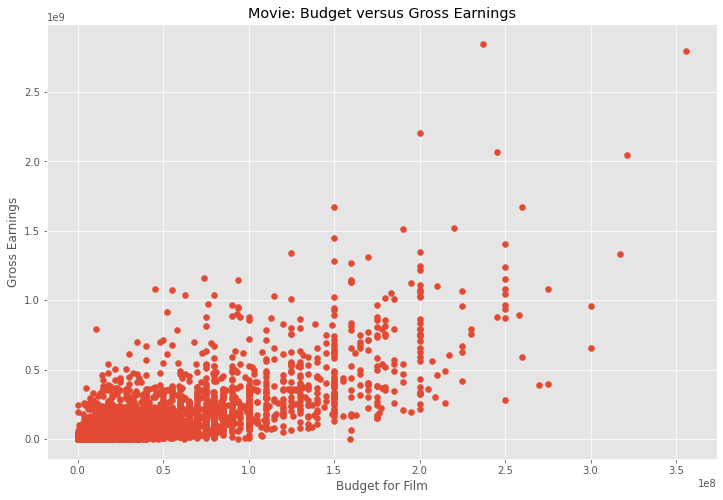

In [20]:
plt.scatter(df.budget, df.gross)
plt.title('Movie: Budget versus Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

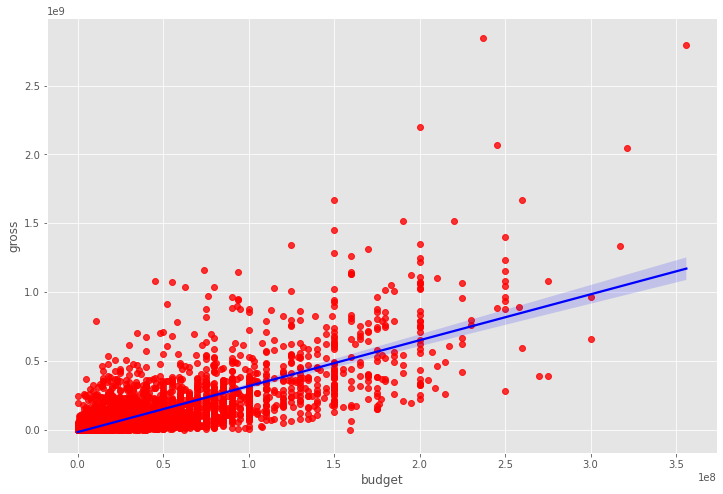

In [21]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'});

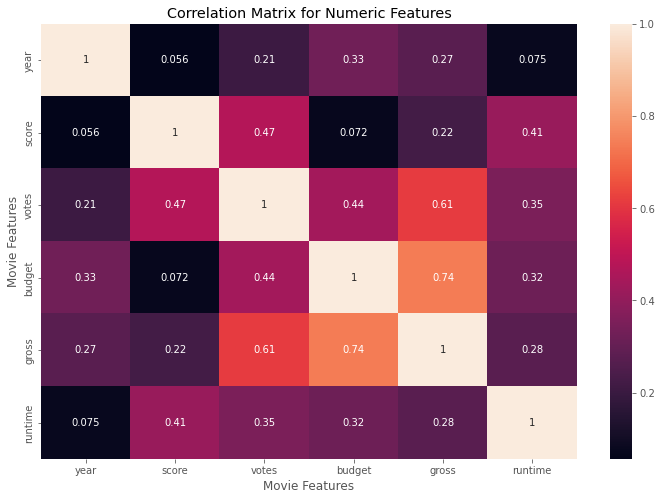

In [22]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [23]:
df_cat_to_num = df

for col_name in df_cat_to_num:
  if df_cat_to_num[col_name].dtype == 'object':
    df_cat_to_num[col_name] = df_cat_to_num[col_name].astype('category')
    df_cat_to_num[col_name] = df_cat_to_num[col_name].cat.codes
df_cat_to_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96.0,35
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97.0,14
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108.0,21
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85.0,2


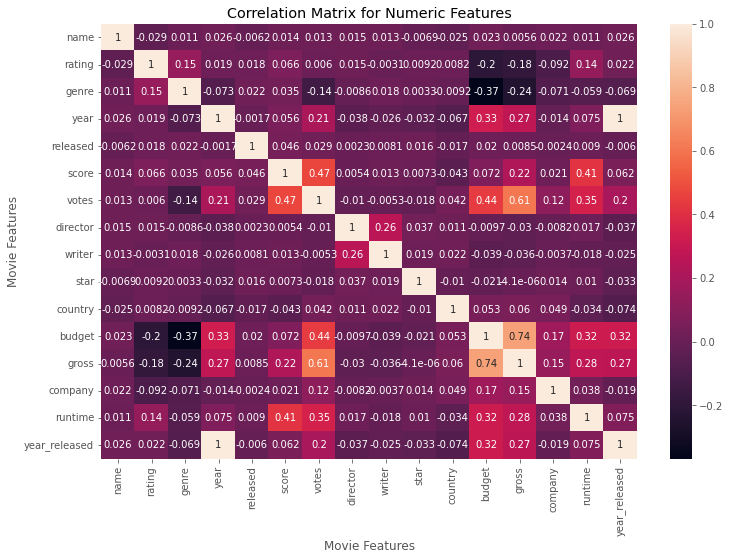

In [24]:
correlation_matrix = df_cat_to_num.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [25]:
df_cat_to_num.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
name,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0
rating,-0.0,1.0,0.1,0.0,0.0,0.1,0.0,0.0,-0.0,0.0,0.0,-0.2,-0.2,-0.1,0.1,0.0
genre,0.0,0.1,1.0,-0.1,0.0,0.0,-0.1,-0.0,0.0,0.0,-0.0,-0.4,-0.2,-0.1,-0.1,-0.1
year,0.0,0.0,-0.1,1.0,-0.0,0.1,0.2,-0.0,-0.0,-0.0,-0.1,0.3,0.3,-0.0,0.1,1.0
released,-0.0,0.0,0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
score,0.0,0.1,0.0,0.1,0.0,1.0,0.5,0.0,0.0,0.0,-0.0,0.1,0.2,0.0,0.4,0.1
votes,0.0,0.0,-0.1,0.2,0.0,0.5,1.0,-0.0,-0.0,-0.0,0.0,0.4,0.6,0.1,0.4,0.2
director,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
writer,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.3,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
star,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0


In [26]:
# paired features are in numeric which might be a problem from colab
corr_matrix = df_cat_to_num
corr_pairs = corr_matrix.unstack()
corr_pairs

name           5445    386.0
               7445    388.0
               3045   4909.0
               6663   3643.0
               7244    389.0
                       ...  
year_released  5640     35.0
               2434     14.0
               3681     21.0
               272       2.0
               3203     17.0
Length: 86736, dtype: float64

In [27]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre  4495            0.0
       6100            0.0
       475             0.0
       3289            0.0
       6596            0.0
                  ...     
gross  7244   2048359754.0
       6663   2069521700.0
       3045   2201647264.0
       7445   2797501328.0
       5445   2847246203.0
Length: 86736, dtype: float64

In [28]:
highly_correlated = sorted_pairs[(sorted_pairs) > 0.5]
highly_correlated

year_released  133             1.0
genre          5020            1.0
year_released  173             1.0
genre          4821            1.0
               2007            1.0
                          ...     
gross          7244   2048359754.0
               6663   2069521700.0
               3045   2201647264.0
               7445   2797501328.0
               5445   2847246203.0
Length: 85275, dtype: float64